# SAYT SOMETHING HERE
Looking at the occupation of Legal Professions: Lawyers, Juges, Magistrates, and other judicial positions (occ2012 = 2100)

https://osf.io/uqe8z = shows what variables mean

### Importing Libraries

In [470]:
import pandas as pd
import numpy as np
import warnings
from plotnine import *
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
from statsmodels.tools.eval_measures import mse,rmse
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")

### Reading Data & Exploratory Data Analysis

In [295]:
#reading file. morg2014.csv was too large- had to turn into zip file
file = pd.read_csv('ezyzip.zip')

In [296]:
#see data
file.shape

(317056, 96)

In [297]:
#Legal Professions like lawyers, judges, magistrates, and other judicial positions
#at start: 1,666 observations
law = file.loc[file['occ2012'] == 2100].reset_index(drop=True)
law.head()

,hhid,intmonth,hurespli,minsamp,hrlonglk,hrsample,hrhhid2,serial,hhnum,state,...,ym_file,ym,ch02,ch35,ch613,ch1417,ch05,ihigrdc,docc00,dind02
0,960021970039060,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,63,...,648,633,0,0,0,0,0,18.0,Legal occupations,Professional and Technical services
1,235004820400137,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,86,...,648,633,0,0,0,0,0,18.0,Legal occupations,Public Administration
2,985879730586005,January,3.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,71,...,648,633,0,0,0,1,0,18.0,Legal occupations,Professional and Technical services
3,94927107035608,January,2.0,MIS 4,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,93,...,648,645,0,0,1,0,0,18.0,Legal occupations,Professional and Technical services
4,97977400095618,January,1.0,MIS 4,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,93,...,648,645,0,0,0,1,0,18.0,Legal occupations,Professional and Technical services


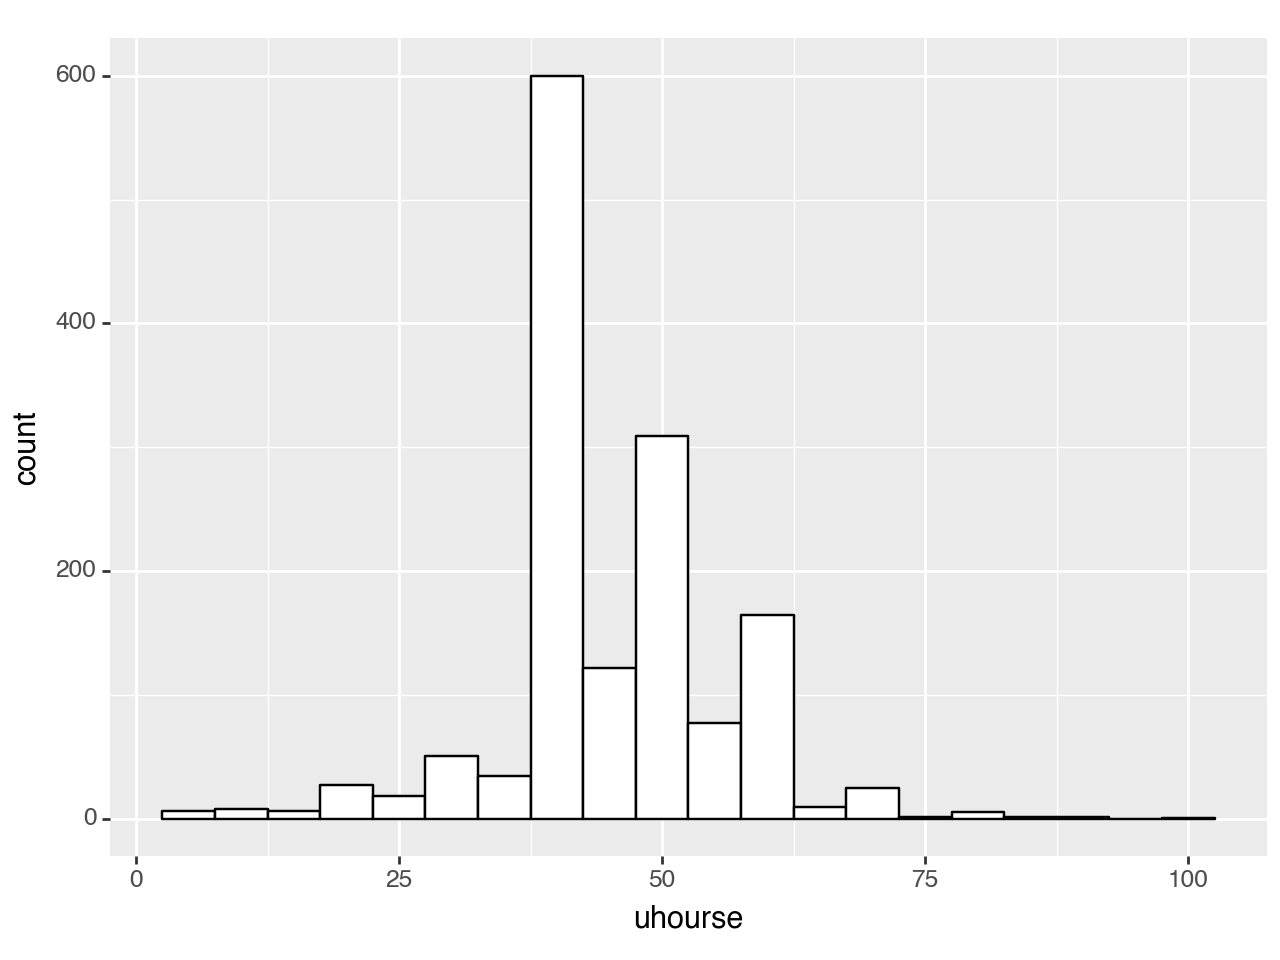

<Figure Size: (640 x 480)>

In [299]:
#checking distribution of 'uhourse' to see if imputation using median or mean is better. not normally distributed,
#therefore, will use median to impute
(ggplot(law, aes(x='uhourse')) +
    geom_histogram(binwidth= 5, colour="black", fill="white"))

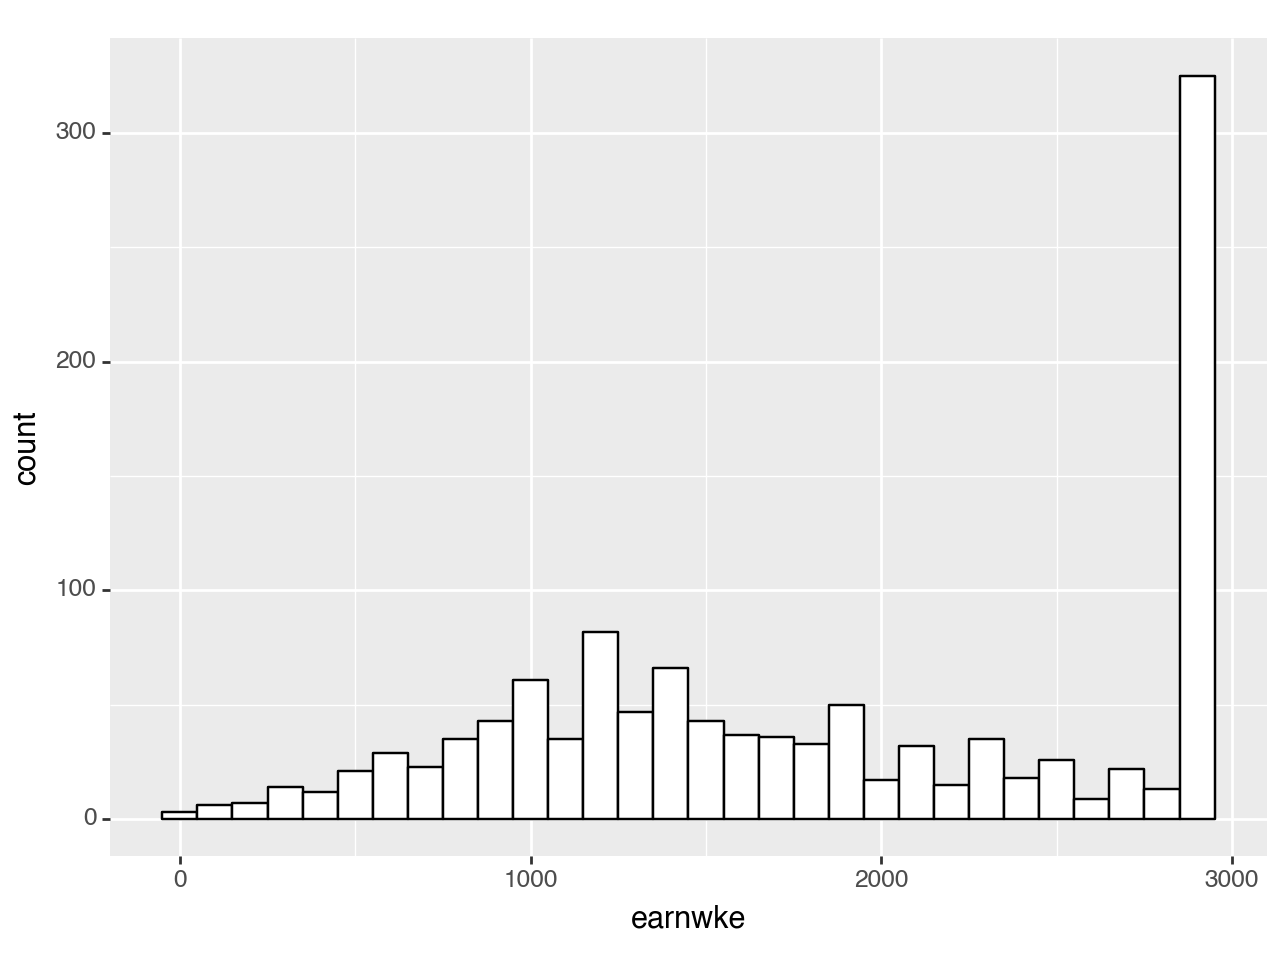

<Figure Size: (640 x 480)>

In [300]:
#checking distribution of 'earnwke' to see if imputation using median or mean is better. 
(ggplot(law, aes(x='earnwke')) +
    geom_histogram(binwidth= 100, colour="black", fill="white"))

In [301]:
print(f'law.earnwke mean:{law.earnwke.mean()}')
print(f'law.earnwke median:{law.earnwke.median()}')
#As these 2 values are close together, I am opting for the mean value due to over 300 observations falling in the
#final bin

law.earnwke mean:1838.655238493724
law.earnwke median:1730.76


In [474]:
#checking for null values:

#age: no missing values
law.age.isnull().value_counts()

#sex: no missing values
law.sex.isnull().value_counts()

#uhourse: 189 null. using median to impute
uhourse_median_value = law.uhourse.median()
law.uhourse.fillna(value=uhourse_median_value, inplace = True)
law.uhourse.isnull().value_counts()
#no missing values anymore

#grade92: no missing values
law.grade92.isnull().value_counts()

#earnwke: 471 null. using mean to impute
earnwke_mean_value = law.earnwke.mean()
law.earnwke.fillna(value=earnwke_mean_value, inplace = True)
law.earnwke.isnull().value_counts()
#no missing values anymore

#state: no missing values
law.state.isnull().value_counts()
#USING DIVISIONS instead

#race: no missing values
law.race.isnull().value_counts()

#prcitshp: no missing values
law.prcitshp.isnull().value_counts()
#USING dummy variable instead of str

#marital: no missing values
law.marital.isnull().value_counts()
#USING married and single dummy variables

#ownchild: no missing values
law.ownchild.isnull().value_counts()


ownchild
False    1666
Name: count, dtype: int64

In [475]:
#creation of outcome variable (y)
law['earnperhr'] = law['earnwke']/law['uhourse']
law['earnperhr'][:5]

0    28.846000
1    34.615250
2    45.966381
3    45.966381
4    46.140000
Name: earnperhr, dtype: float64

In [303]:
#fixing state variable (some were int and some were str), making into divisions
print(law.state.unique())

#NE Division
law.state.replace('MA', 11, inplace = True)
law.state.replace('NH', 12, inplace = True)
law.state.replace('VT', 13, inplace = True)
law.state.replace('MA', 14, inplace = True)
law.state.replace('RI', 15, inplace = True)
law.state.replace('CT', 16, inplace = True)
#Middle Atlantic Division
law.state.replace('NY', 21, inplace = True)
law.state.replace('NJ', 22, inplace = True)
law.state.replace('PA', 23, inplace = True)
#East North Central Division
law.state.replace('OH', 31, inplace = True)
law.state.replace('IN', 32, inplace = True)
law.state.replace('IL', 33, inplace = True)
law.state.replace('MI', 34, inplace = True)
law.state.replace('WI', 35, inplace = True)
#West North Central Division
law.state.replace('MN', 41, inplace = True)
law.state.replace('IA', 42, inplace = True)
law.state.replace('MO', 43, inplace = True)
law.state.replace('ND', 44, inplace = True)
law.state.replace('SD', 45, inplace = True)
law.state.replace('46', 46, inplace = True)
law.state.replace('47', 47, inplace = True)
#South Atlantic Division
law.state.replace('51', 51, inplace = True)
law.state.replace('52', 52, inplace = True)
law.state.replace('53', 53, inplace = True)
law.state.replace('54', 54, inplace = True)
law.state.replace('55', 55, inplace = True)
law.state.replace('56', 56, inplace = True)
law.state.replace('57', 57, inplace = True)
law.state.replace('58', 58, inplace = True)
law.state.replace('59', 59, inplace = True)
#East South Central Division
law.state.replace('61', 61, inplace = True)
law.state.replace('62', 62, inplace = True)
law.state.replace('63', 63, inplace = True)
law.state.replace('64', 64, inplace = True)
#West South Central Division
law.state.replace('71', 71, inplace = True)
law.state.replace('72', 72, inplace = True)
law.state.replace('73', 73, inplace = True)
law.state.replace('74', 74, inplace = True)
#Mountain Division
law.state.replace('81', 81, inplace = True)
law.state.replace('82', 82, inplace = True)
law.state.replace('83', 83, inplace = True)
law.state.replace('84', 84, inplace = True)
law.state.replace('85', 85, inplace = True)
law.state.replace('86', 86, inplace = True)
law.state.replace('87', 87, inplace = True)
law.state.replace('88', 88, inplace = True)
#Pacific Division
law.state.replace('91', 91, inplace = True)
law.state.replace('92', 92, inplace = True)
law.state.replace('93', 93, inplace = True)
law.state.replace('94', 94, inplace = True)
law.state.replace('95', 95, inplace = True)
#left over state numbers
#putting all numbers 1-9 into their divisions (1st number is the division they are in)
#doesn't matter what the state is because the categories will be their divisions
law.state.replace('7', 71, inplace = True)
law.state.replace('9', 91, inplace = True)
law.state.replace(1, 11, inplace = True)
law.state.replace(2, 21, inplace = True)
law.state.replace(3, 31, inplace = True)
law.state.replace(4, 41, inplace = True)
law.state.replace(5, 51, inplace = True)
law.state.replace(6, 61, inplace = True)
law.state.replace(7, 71, inplace = True)
law.state.replace(8, 81, inplace = True)
law.state.replace(9, 91, inplace = True)

#creating categories for state divisions (dummy variables)    
law['NE_Division'] = law['state'].isin([11,12,13,14,15,16]).astype(int)
law['Middle_Atlantic_Division'] = law['state'].isin([21,22,23]).astype(int)
law['East_North_Central_Division'] = law['state'].isin([31,32,33,34,35]).astype(int)
law['West_North_Central_Division'] = law['state'].isin([41,42,43,44,45,46,47]).astype(int)
law['South_Atlantic_Division'] = law['state'].isin([51,52,53,54,55,56,57,58,59]).astype(int)
law['East_South_Central_Division'] = law['state'].isin([61,62,63,64]).astype(int)
law['West_South_Central_Division'] = law['state'].isin([71,72,73,74]).astype(int)
law['Mountain_Division'] = law['state'].isin([81,82,83,84,85,86,87,88]).astype(int)
law['Pacific_Division'] = law['state'].isin([91,92,93,94,95]).astype(int)

['63' '86' '71' '93' '84' 'CT' '53' '59' '58' '82' 'IL' 'IN' '47' '61'
 '72' '52' 'MA' 'MI' 'MN' '64' '46' '88' 'NJ' '85' 'NY' '56' 'ND' 'OH'
 '92' 'PA' 'RI' '57' '62' '74' 'VT' '54' '91' 'WI' '94' '51' '95' 'IA'
 'MO' 'NH' 'SD' '87' '55' '81' '73' '83' '7' '9' 9 8 1 5 3 4 6 7 2]


In [304]:
#fixing race category to be dummy variable
law['race_white'] = (law['race'] == 1).astype(int)
law['race_black'] = (law['race'] == 2).astype(int)
law['race_american_indian'] = (law['race'] == 3).astype(int)
law['race_asian_or_pacific_is'] = (law['race'] == 4).astype(int)
law['race_other'] = (law['race'] == 5).astype(int)
law['race_mixed_black_white'] = (law['race'] == 6).astype(int)
law['race_mixed_white_american_indian'] = (law['race'] == 7).astype(int)
law['race_mixed_white_asian'] = (law['race'] == 8).astype(int)
law['race_mixed_black_american_indian'] = (law['race'] == 10).astype(int)
law['race_mixed_black_asian'] = (law['race'] == 11).astype(int)

In [305]:
#fixing marital variable
law['married'] = law['marital'].isin([1,2,3]).astype(int)
law['single'] = law['marital'].isin([4,5,6,7]).astype(int)

In [306]:
#creating dummy variable for sex (female)
law['female'] = (law["sex"] == 2).astype(int)

In [307]:
#creating dummy variable for grade92
law['grade92'].min() #33, 5th-6th grade (middle school)
law['grade92'].max() #46, doctorate degree
law['grade92'].mean() #about 45, professional school degree (includes JD)
law.loc[law['grade92'] < 45] #only 185 observations with grade92 less than 45
law['ed_low'] = (law['grade92']< 45).astype(int) #less than professional degree (includes bachelors and masters)
law['ed_high'] = (law['grade92']>=45).astype(int) #equal to or higher than professional degree (includes professional degree and doctorate)

In [308]:
#fixing prcitshp variable to be int instead of str
law.prcitshp.replace('Native, Born In US', 1, inplace = True)
law.prcitshp.replace('Foreign Born, US Cit By Naturalization', 1, inplace = True)
law.prcitshp.replace('Foreign Born, Not a US Citizen', 0, inplace = True)
law.prcitshp.replace('Native, Born Abroad Of US Parent(s)', 1, inplace = True)
law.prcitshp.replace('Native, Born in PR or US Outlying Area', 1, inplace = True)

#making prcitshp a dummy variable
law['us_citizen'] = (law['prcitshp'] == 1).astype(int)

In [309]:
#fixing ownchild to be dummy variable
law['no_child'] = (law['ownchild'] == 0).astype(int)
law['one_child'] = (law['ownchild'] == 1).astype(int)
law['two_child'] = (law['ownchild'] == 2).astype(int)
law['three_child'] = (law['ownchild'] == 3).astype(int)
law['four_child'] = (law['ownchild'] == 4).astype(int)
law['five_child'] = (law['ownchild'] == 5).astype(int)
law['six_child'] = (law['ownchild'] == 6).astype(int)

In [310]:
###CORINNEE!!! make legends for some of these variables (example: race is integers...give 
#the legend of what that means!!!) = turn into markdown
#age = age of employee in years
#sex = 1 if male, 2 if female
#uhourse = usual hours worked per week
#grade92 = education level (ints 31-46 representing Kindergarten-doctorate degree)
#earnwke = weekly earnings in USD
#state = in which state the employee resides
#race = 1:White, 2:Black, 3:American Indian, 4:Asian or Pacific Islander, 5:Other, 6:Mixed(White/Black), 7:Mixed(White/American Indian), 8:Mixed(White/Asian), 10:Mixed(Black/American Indian), 11:Mixed(Black/Asian)
#prcitshp = 1 if American citizen, 0 if non-American citizen
#marital = 1-3 if married, 4-7 if currently single
#ownchild = number of children employee has in primary family

In [311]:
###CORINNE'S PLAN
# y = earnings per hour ('earnperhr')
    #this means... earnwke (weekly earnings)/uhourse
# x = age(int), sex(int), uhourse (usual work hours)(int), grade92 (highest educational grade completed)(int)
# Model 1: age, sex(female dummy)
# Model 2: age, sex(female dummy), uhourse, grade92/ed_low/high
# Model 3: age, sex(female dummy), uhourse, grade92/ed_low/high, state division, race, prcitshp,
# Model 4: age, sex(female dummy), uhourse, grade92/ed_low/high, state division, race, prcitshp, marital, ownchild

#could do 'state' as a variable, but would have to create dummy variables... (str)
#could do 'race' as a variable, but would have to create dummy variables... (int)
#could do 'prcitshp' (citizenship status) as a variable, but would have to create dummy variable...(str)
#could do 'marital' as variable...dummy variables would be 1,2,3 = 'married', 4,5,6,7 = 'single'(int)
#could do 'ownchild' as variable = shows number of children less than 18 in the primary family(int)

#deleting ethnic category because only 68/1,666 were not null!

## BIC in full sample

In [312]:
reg1 = smf.ols(formula="earnperhr~age+ female", data=law).fit(cov_type="HC1")
#Male is the reference category for female
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:              earnperhr   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     17.32
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           3.92e-08
Time:                        16:22:24   Log-Likelihood:                -4786.5
No. Observations:                1119   AIC:                             9579.
Df Residuals:                    1116   BIC:                             9594.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.9342      2.076     16.350      0.0

In [313]:
reg1.bic

9594.0812746174

In [314]:
reg2 = smf.ols(formula="earnperhr~age+ female+uhourse+ed_high", data=law).fit(cov_type="HC1")
#Male is the reference category for female, ed_low is the reference category for ed_high
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:              earnperhr   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     21.70
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           2.94e-17
Time:                        16:22:24   Log-Likelihood:                -4761.9
No. Observations:                1119   AIC:                             9534.
Df Residuals:                    1114   BIC:                             9559.
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.3915      3.594      8.735      0.0

In [315]:
reg2.bic

9558.988087975542

In [316]:
reg3 = smf.ols(formula='''earnperhr~age+ female+uhourse+ed_high+NE_Division+Middle_Atlantic_Division+ 
                East_North_Central_Division+West_North_Central_Division+South_Atlantic_Division+
                East_South_Central_Division+West_South_Central_Division+
                Mountain_Division+race_black+race_american_indian+
                race_asian_or_pacific_is+race_other+race_mixed_black_white+
                race_mixed_white_american_indian+race_mixed_white_asian+
                race_mixed_black_american_indian+race_mixed_black_asian+us_citizen''', data=law).fit(cov_type="HC1")
#Male is the reference category for female, ed_low is the reference category for ed_high
#Pacific_Division is the reference category for all listed state divisions
#race_white is the reference category for all listed races
#Not being a US citizen is the reference category for us_citizen
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:              earnperhr   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     107.3
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          3.05e-234
Time:                        16:22:24   Log-Likelihood:                -4741.4
No. Observations:                1119   AIC:                             9529.
Df Residuals:                    1096   BIC:                             9644.
Df Model:                          22                                         
Covariance Type:                  HC1                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [317]:
reg3.bic
#strong multicollinearity could be due to the fact that many of the observations have race of white. there are only
#there are only 199 with other races specified

9644.230054440795

In [318]:
reg4 = smf.ols(formula='''earnperhr~age+ female+uhourse+ed_high+NE_Division+Middle_Atlantic_Division+ 
                East_North_Central_Division+West_North_Central_Division+South_Atlantic_Division+
                East_South_Central_Division+West_South_Central_Division+
                Mountain_Division+race_black+race_american_indian+
                race_asian_or_pacific_is+race_other+race_mixed_black_white+
                race_mixed_white_american_indian+race_mixed_white_asian+
                race_mixed_black_american_indian+race_mixed_black_asian+us_citizen
                +married+one_child+two_child+three_child+
                four_child+five_child+six_child''', data=law).fit(cov_type="HC1")
#Male is the reference category for female, ed_low is the reference category for ed_high
#Pacific_Division is the reference category for all listed state divisions
#race_white is the reference category for all listed races
#Not being a US citizen is the reference category for us_citizen
#single is the reference category for married
#no_child is the reference category for those with 1-6 children
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:              earnperhr   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     94.84
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          6.31e-247
Time:                        16:22:24   Log-Likelihood:                -4734.3
No. Observations:                1119   AIC:                             9527.
Df Residuals:                    1090   BIC:                             9672.
Df Model:                          28                                         
Covariance Type:                  HC1                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [319]:
reg4.bic

9672.228139011642

In [337]:
#reordering covariate order
star = Stargazer([reg1, reg2, reg3, reg4])
cov_order = ['Intercept', 'age', 'female', 'uhourse', 'ed_high', 'NE_Division', 'Middle_Atlantic_Division',
                          'East_North_Central_Division', 'West_North_Central_Division', 'South_Atlantic_Division',
                          'East_South_Central_Division', 'West_South_Central_Division', 'Mountain_Division',
                          'race_black','race_american_indian', 'race_asian_or_pacific_is', 'race_other', 'race_mixed_black_white',
                          'race_mixed_white_american_indian','race_mixed_white_asian', 'race_mixed_black_american_indian',
                          'race_mixed_black_asian', 'us_citizen', 'married', 'one_child', 'two_child', 'three_child',
                          'four_child', 'five_child', 'six_child']
star.covariate_order(cov_order)
star

In [320]:
reg_names = ['reg1', 'reg2', 'reg3', 'reg4']
reg_bics = [reg1.bic, reg2.bic, reg3.bic, reg4.bic]
regs_and_bics = list(zip(reg_names,reg_bics))

#shows which regression had the lowest/most favorable bic = Regression 2
sorted(regs_and_bics, key = lambda x: x[1])

[('reg2', 9558.988087975542),
 ('reg1', 9594.0812746174),
 ('reg3', 9644.230054440795),
 ('reg4', 9672.228139011642)]

## Linear Regression with k-fold cross-validation (cross-validated RMSE)

In [401]:
#creating 5 splits. 80% in training set, 20% in test set
from sklearn.model_selection import KFold
k = KFold(n_splits=5, shuffle=False, random_state=None)

In [402]:
for train_index, test_index in k.split(law):
    print(train_index, '\n', '\n', test_index, '\n')

print(f"Length of training_sets: {len(train_index)}")
print(f"Length of test_sets: {len(test_index)}")

[ 334  335  336 ... 1663 1664 1665] 
 
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 23

In [451]:
### Cross validate OLS with combining sklearn k-fold cross validation and statsmodels ols formula


def cv_reg(formula, data, kfold, robustse=None):
    regression_list = []
    predicts_on_test = []
    rsquared = []
    rmse_list = []

    # Calculating OLS for each fold

    for train_index, test_index in k.split(data):
        # print("TRAIN:", train_index, "TEST:", test_index)
        data_train, data_test = data.iloc[train_index, :], data.iloc[test_index, :]
        if robustse is None:
            model = smf.ols(formula, data=data_train).fit()
        else:
            model = smf.ols(formula, data=data_train).fit(cov_type=robustse)
        regression_list += [model]
        predicts_on_test += [model.predict(data_test)]
        rsquared += [model.rsquared]
        rmse_list += [rmse(data_train[formula.split("~")[0]], model.predict(data_train))]

    return {
        "regressions": regression_list,
        "test_predict": predicts_on_test,
        "r2": rsquared,
        "rmse": rmse_list,
    }


def summarize_cv(cvlist, stat="rmse"):
    result = pd.DataFrame(
        {"Model" + str(x + 1): cvlist[x][stat] for x in range(len(cv_list))}
    )
    result["Resample"] = ["Fold" + str(x + 1) for x in range(len(cvlist[0]["rmse"]))]
    result = result.set_index("Resample")
    result = pd.concat([result, pd.DataFrame(result.mean(), columns=["Average"]).T])
    return result

In [452]:
cv1 = cv_reg("earnperhr~age+female", law, k, "HC1")

cv2 = cv_reg("earnperhr~age+ female+uhourse+ed_high", law, k, "HC1")

cv3 = cv_reg('''earnperhr~age+ female+uhourse+ed_high+NE_Division+Middle_Atlantic_Division+ 
                 East_North_Central_Division+West_North_Central_Division+South_Atlantic_Division+
                 East_South_Central_Division+West_South_Central_Division+
                 Mountain_Division+race_black+race_american_indian+
                 race_asian_or_pacific_is+race_other+race_mixed_black_white+
                 race_mixed_white_american_indian+race_mixed_white_asian+
                 race_mixed_black_american_indian+race_mixed_black_asian+us_citizen''', law, k, "HC1")

cv4 = cv_reg('''earnperhr~age+ female+uhourse+ed_high+NE_Division+Middle_Atlantic_Division+ 
                East_North_Central_Division+West_North_Central_Division+South_Atlantic_Division+
                East_South_Central_Division+West_South_Central_Division+
                Mountain_Division+race_black+race_american_indian+
                race_asian_or_pacific_is+race_other+race_mixed_black_white+
                race_mixed_white_american_indian+race_mixed_white_asian+
                race_mixed_black_american_indian+race_mixed_black_asian+us_citizen
                +married+one_child+two_child+three_child+
                four_child+five_child+six_child''', law, k, "HC1")

cv_list = [cv1, cv2, cv3, cv4]

In [453]:
summarize_cv(cv_list)
#RMSE for every single fold and every model
#lowest avg RMSE is on most complicated model (Model4)!!
#this means that on average, the model's predictions deviate from the actual values (earnings per hour) by about
#16.5 USD. 

,Model1,Model2,Model3,Model4
Fold1,17.553881,17.164969,16.812418,16.712546
Fold2,17.238396,16.833291,16.573209,16.491050
Fold3,17.478783,17.098997,16.665957,16.593073
Fold4,17.225261,16.804404,16.472215,16.254397
Fold5,17.658324,17.352077,17.056262,16.941158
Average,17.430929,17.050748,16.716012,16.598445


## RMSE on full sample

In [499]:
#RMSE on full sample (reg1)

formula="earnperhr~age+ female"

full_model = smf.ols(formula, data=law).fit(cov_type="HC1")

# Make predictions on the full dataset
law['predictions'] = full_model.predict(law)

# Calculate RMSE
rmse_full = np.sqrt(mean_squared_error(law['earnperhr'], law['predictions']))

print(f"RMSE on 1st regression model (full sample): {rmse_full}\n")
print(law.earnperhr.describe())
#means that on average, the model's predictions deviate from the actual values (earnings per hour) by about 28.5 USD.
#this is large considering 75% of the observations have employees making uner 51 USD per hour.

RMSE on 1st regression model (full sample): 28.46259101019459

count    1666.000000
mean       43.617195
std        28.774978
min         0.000000
25%        30.375278
50%        44.522222
75%        51.923000
max       612.885079
Name: earnperhr, dtype: float64


In [496]:
#RMSE on full sample (reg2)

formula="earnperhr~age+ female+uhourse+ed_high"

full_model = smf.ols(formula, data=law).fit(cov_type="HC1")

# Make predictions on the full dataset
law['predictions'] = full_model.predict(law)

# Calculate RMSE
rmse_full = np.sqrt(mean_squared_error(law['earnperhr'], law['predictions']))

print(f"RMSE on 2nd regression model (full sample): {rmse_full}")
#means that on average, the model's predictions deviate from the actual values (earnings per hour) by about 26.4 USD.
#this is large considering 75% of the observations have employees making uner 51 USD per hour.

RMSE on 2nd regression model (full sample): 26.409482830303105


In [495]:
#RMSE on full sample (reg3)

formula='''earnperhr~age+ female+uhourse+ed_high+NE_Division+Middle_Atlantic_Division+ 
                East_North_Central_Division+West_North_Central_Division+South_Atlantic_Division+
                East_South_Central_Division+West_South_Central_Division+
                Mountain_Division+race_black+race_american_indian+
                race_asian_or_pacific_is+race_other+race_mixed_black_white+
                race_mixed_white_american_indian+race_mixed_white_asian+
                race_mixed_black_american_indian+race_mixed_black_asian+us_citizen'''

full_model = smf.ols(formula, data=law).fit(cov_type="HC1")

# Make predictions on the full dataset
law['predictions'] = full_model.predict(law)

# Calculate RMSE
rmse_full = np.sqrt(mean_squared_error(law['earnperhr'], law['predictions']))

print(f"RMSE on 3rd regression model (full sample): {rmse_full}")
#means that on average, the model's predictions deviate from the actual values (earnings per hour) by about 26.2 USD.
#this is large considering 75% of the observations have employees making uner 51 USD per hour.

RMSE on 3rd regression model (full sample): 26.202940256318474


In [494]:
#RMSE on full sample (reg4)

formula='''earnperhr~age+ female+uhourse+ed_high+NE_Division+Middle_Atlantic_Division+ 
                East_North_Central_Division+West_North_Central_Division+South_Atlantic_Division+
                East_South_Central_Division+West_South_Central_Division+
                Mountain_Division+race_black+race_american_indian+
                race_asian_or_pacific_is+race_other+race_mixed_black_white+
                race_mixed_white_american_indian+race_mixed_white_asian+
                race_mixed_black_american_indian+race_mixed_black_asian+us_citizen
                +married+one_child+two_child+three_child+
                four_child+five_child+six_child'''

full_model = smf.ols(formula, data=law).fit(cov_type="HC1")

# Make predictions on the full dataset
law['predictions'] = full_model.predict(law)

# Calculate RMSE
rmse_full = np.sqrt(mean_squared_error(law['earnperhr'], law['predictions']))

print(f"RMSE on 4th regression model (full sample): {rmse_full}")
#means that on average, the model's predictions deviate from the actual values (earnings per hour) by about 26.1 USD.
#this is somewhat considering 75% of the observations have employees making uner 51 USD per hour.

RMSE on 4th regression model (full sample): 26.141877697778355


In [ ]:
#The best RMSE in the 